# Chapter 6

## 6.9

In [7]:
import numpy as np
from math import sqrt, log, ceil

class GaussianBandit:

    # accepts two lists of K >= 2 floats that are means and variances of K arms
    def __init__ (self, means, vars, seed=541):
        self.num_of_arms = len(means)
        assert self.num_of_arms >= 2, "Number of arms must be >= 2!"

        self.arm_means = means
        self.arm_vars = vars
        self.best_arm_idx = np.argmax(means)
        self.best_arm_mean = np.max(means)
        self.seed = seed
        self.rng = np.random.default_rng(seed)
        self.pulled_arm_history = []
        self.pulled_arm_mean_history = []
        self.reward_history = []

    # Function should return the number of arms
    def K(self):
        return self.num_of_arms

    # Accepts a parameter 0 <= a <= K-1 and returns the
    # realisation of random variable X followed a Gaussian distribution.
    def pull(self, a):
        pulled_arm_mean = self.arm_means[a]
        pulled_arm_var = self.arm_vars[a]
        reward = self.rng.normal(pulled_arm_mean, sqrt(pulled_arm_var))

        self.pulled_arm_history.append(a)
        self.pulled_arm_mean_history.append(pulled_arm_mean)
        self.reward_history.append(reward)
        return reward

    # Returns the regret incurred so far.
    def regret(self):
        random_regret = len(self.reward_history) * self.best_arm_mean - np.sum(self.reward_history)
        pseudo_regret = len(self.reward_history) * self.best_arm_mean - np.sum(self.pulled_arm_mean_history)
        return {"random": random_regret, "pseudo": pseudo_regret}

def ExploreThenCommit(bandit, n, m, seed=541):
    """
    Implementation of the explore-then-commit algorithm
    -----
    bandit: the bandit instance
    n: time horizon
    m: exploration time of each arm
    """

    rng = np.random.default_rng(seed)
    
    K = bandit.K()

    reward_history = {}

    # explore
    for a in range(K):
            reward_history[a] = [bandit.pull(a)]
    for t in range(m - 1):
        for a in range(K):
            reward_history[a].append(bandit.pull(a))

    # then
    est_best_arm = -1
    est_best_arm_score = -np.inf
    for a in range(K):
        candidate_score = np.mean(reward_history[a])
        if candidate_score == est_best_arm_score:
                est_best_arm = rng.choice([est_best_arm, a])
        elif candidate_score > est_best_arm_score:
                est_best_arm = a
                est_best_arm_score = candidate_score

    # commit
    for t in range(m * K, n):
        # pull the leader arm
        reward_history[est_best_arm].append(bandit.pull(est_best_arm))

def FindOptimalM(n, gap):
    """
    Find the optimal value of m in equation 6.5 in Lattimore (2018)
    -----
    n: time horizon
    gap: the suboptimal gap
    """

    return max(1, ceil(4 / gap ** 2 * log(n * gap ** 2 / 4)))

def FindUpperBound(n, gap):
    """ 
    Find the upper bound on the regret in equation 6.6 in Lattimore (2018)
    """

    return min(n * gap, gap + 4 / gap * (1 + max(0, log(n * gap ** 2 / 4))))

### Part (b)

In [16]:
gaps = np.arange(0.01, 1, 0.005)
n = 1000
N = 5000
avg_regret_log = []
upper_bound_log = []

for gap in gaps:
    optimal_m = FindOptimalM(n, gap)
    upper_bound_log.append(FindUpperBound(n, gap))
    regret_log = []
    for seed in range(N):
        bandit = GaussianBandit([0, -gap], [1, 1], seed)
        ExploreThenCommit(bandit, n, optimal_m)
        regret_log.append(bandit.regret()["pseudo"])
    avg_regret_log.append(np.mean(regret_log))
    # print(f"average regret is {avg_regret_log[-1]}")

C:\Users\Wenhao\AppData\Local\Temp\ipykernel_11656\1640908366.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


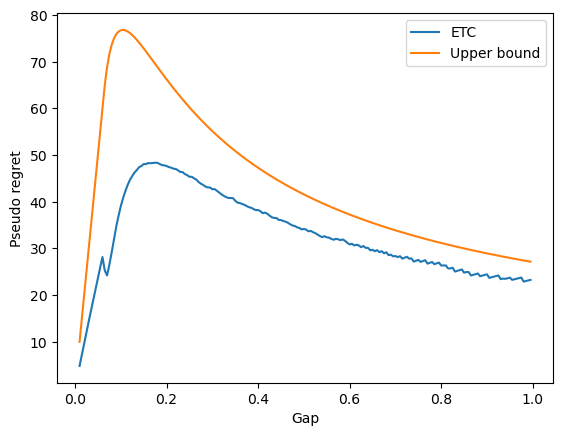

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(gaps, avg_regret_log, label="ETC")
ax.plot(gaps, upper_bound_log, label="Upper bound")
ax.set_xlabel("Gap")
ax.set_ylabel("Pseudo regret")
ax.legend()
fig.show()

### Part (c) and (d)

C:\Users\Wenhao\AppData\Local\Temp\ipykernel_11656\3082671659.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Wenhao\AppData\Local\Temp\ipykernel_11656\3082671659.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


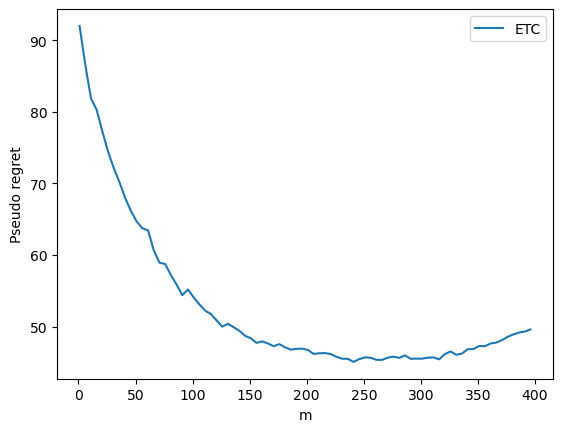

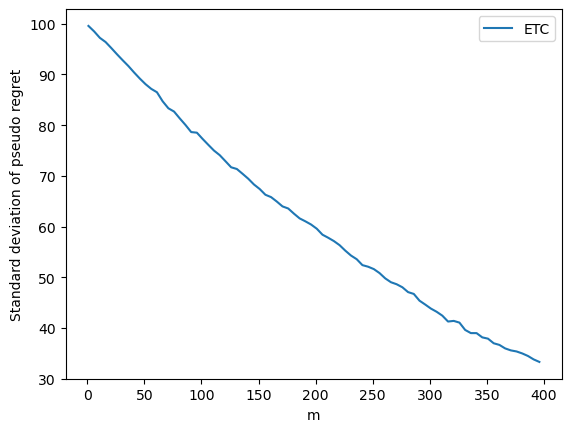

: 

In [19]:
gap = 0.1
ms = np.arange(1, 400, 5)
n = 2000
N = 5000
avg_regret_log = []
sd_regret_log = []

for m in ms:
    regret_log = []
    for seed in range(N):
        bandit = GaussianBandit([0, -gap], [1, 1], seed)
        ExploreThenCommit(bandit, n, m)
        regret_log.append(bandit.regret()["pseudo"])
    avg_regret_log.append(np.mean(regret_log))
    sd_regret_log.append(np.std(regret_log))

fig, ax = plt.subplots()
ax.plot(ms, avg_regret_log, label="ETC")
ax.set_xlabel("m")
ax.set_ylabel("Pseudo regret")
ax.legend()
fig.show()

fig, ax = plt.subplots()
ax.plot(ms, sd_regret_log, label="ETC")
ax.set_xlabel("m")
ax.set_ylabel("Standard deviation of pseudo regret")
ax.legend()
fig.show()